In [0]:
from google.colab import files

In [0]:
files.upload()#Upload Your Kaggle API Json File

In [0]:
"Creating .kaggke Folder"""
!mkdir -p ~/.kaggle
"""Copying kaggle.json File To .kaggle"""
!cp kaggle.json ~/.kaggle/
"""Changing Access Mode Of File"""
!chmod 600 ~/.kaggle/kaggle.json
pass

In [4]:
"""Downloading Data From Kaggle"""
!kaggle datasets download -d moltean/fruits #Downloading data from kaggle

 99% 654M/658M [00:11<00:00, 87.0MB/s]
100% 658M/658M [00:11<00:00, 58.6MB/s]


In [5]:
'''Extracting Downloaded File'''
from zipfile import ZipFile
file_name = "/content/fruits.zip"

with ZipFile(file_name,"r") as zip:
    zip.extractall()
    print("Extraction Done")

Extraction Done


In [0]:
"""Importing Modules"""
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import shuffle
from tqdm import tqdm
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
"""Defining Constant Variables"""
TRAIN_DIR = '/content/fruits-360/Training/'
TEST_DIR = '/content/fruits-360/Test/'
IMG_SIZE = 100

In [0]:
"""This function will give label to the image path passed"""
def image_label(img):
    word_label = img.split("/")[-1]
    return(word_label)

In [0]:
"""This function will generate the training data"""
def create_training_data():
    training_data = []
    for img_label in os.listdir(TRAIN_DIR):
        label = image_label(img_label)
        path = os.path.join(TRAIN_DIR,img_label)
        for img in tqdm(os.listdir(path)):
            img = os.path.join(path,img)
            img_ = cv2.imread(img)
            img_ =cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
            #img = cv2.resize(img_, (IMG_SIZE,IMG_SIZE))
            training_data.append([np.array(img_),label])
    shuffle(training_data)
    #np.save('train_data.npy', training_data)
    return (training_data)

In [34]:
"""def process_test_data():
    testing_data = []
    for test in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR,test)
        for img in path:
            img_name = img.split('.')[0]
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img), img_name])
        
    shuffle(testing_data)
    #np.save('test_data.npy', testing_data)
    return (testing_data)"""

"def process_test_data():\n    testing_data = []\n    for test in os.listdir(TEST_DIR):\n        path = os.path.join(TEST_DIR,test)\n        for img in path:\n            img_name = img.split('.')[0]\n            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)\n            #img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))\n            testing_data.append([np.array(img), img_name])\n        \n    shuffle(testing_data)\n    #np.save('test_data.npy', testing_data)\n    return (testing_data)"

In [0]:
def hot_encode(fruit_list):
    values = np.array(fruit_list)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return(onehot_encoded)        

In [36]:
train_data = create_training_data()

100%|██████████| 492/492 [00:00<00:00, 3032.64it/s]


Salak


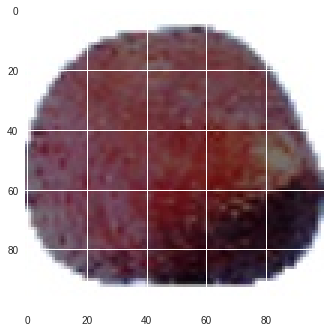

In [37]:
"""This is just made to see the Label and image.
Just change the value of j to do so"""
j=0
print(train_data[j][1])
plt.imshow(train_data[j][0])

In [0]:
arr_train_data = np.array(train_data)

In [39]:
arr_train_data.shape

(48905, 2)

In [40]:
a = set(arr_train_data[:,1])
print(a)

{'Pitahaya Red', 'Pear Williams', 'Limes', 'Tamarillo', 'Pepino', 'Strawberry', 'Apple Red Yellow 2', 'Grapefruit White', 'Tomato Cherry Red', 'Plum 2', 'Clementine', 'Physalis with Husk', 'Tomato Maroon', 'Cherry Wax Red', 'Melon Piel de Sapo', 'Mangostan', 'Tangelo', 'Tomato 4', 'Plum 3', 'Strawberry Wedge', 'Apple Red 3', 'Plum', 'Pear Monster', 'Tomato 3', 'Maracuja', 'Cocos', 'Cantaloupe 2', 'Lemon', 'Apricot', 'Mandarine', 'Kumquats', 'Peach Flat', 'Pear', 'Tomato 1', 'Carambula', 'Pomegranate', 'Avocado', 'Cantaloupe 1', 'Banana', 'Grape White 2', 'Grape White', 'Salak', 'Dates', 'Physalis', 'Apple Braeburn', 'Lychee', 'Kiwi', 'Huckleberry', 'Cherry Rainier', 'Banana Red', 'Grape White 3', 'Pineapple Mini', 'Mango', 'Kaki', 'Grape Blue', 'Cherry Wax Yellow', 'Pear Kaiser', 'Apple Golden 1', 'Nectarine', 'Tomato 2', 'Apple Red Yellow 1', 'Quince', 'Apple Red Delicious', 'Pomelo Sweetie', 'Guava', 'Apple Red 2', 'Apple Golden 2', 'Peach', 'Mulberry', 'Apple Golden 3', 'Cherry 2', 

In [41]:
fruit_list = arr_train_data[:,1]
k = hot_encode(fruit_list)
dic_f = []
for i in range(len(k)):
    dic_f.append([k[i].argmax(),fruit_list[i]])
dic_f = dict(dic_f)
dic_f

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


{0: 'Apple Braeburn',
 1: 'Apple Golden 1',
 2: 'Apple Golden 2',
 3: 'Apple Golden 3',
 4: 'Apple Granny Smith',
 5: 'Apple Red 1',
 6: 'Apple Red 2',
 7: 'Apple Red 3',
 8: 'Apple Red Delicious',
 9: 'Apple Red Yellow 1',
 10: 'Apple Red Yellow 2',
 11: 'Apricot',
 12: 'Avocado',
 13: 'Avocado ripe',
 14: 'Banana',
 15: 'Banana Lady Finger',
 16: 'Banana Red',
 17: 'Cactus fruit',
 18: 'Cantaloupe 1',
 19: 'Cantaloupe 2',
 20: 'Carambula',
 21: 'Cherry 1',
 22: 'Cherry 2',
 23: 'Cherry Rainier',
 24: 'Cherry Wax Black',
 25: 'Cherry Wax Red',
 26: 'Cherry Wax Yellow',
 27: 'Chestnut',
 28: 'Clementine',
 29: 'Cocos',
 30: 'Dates',
 31: 'Granadilla',
 32: 'Grape Blue',
 33: 'Grape Pink',
 34: 'Grape White',
 35: 'Grape White 2',
 36: 'Grape White 3',
 37: 'Grape White 4',
 38: 'Grapefruit Pink',
 39: 'Grapefruit White',
 40: 'Guava',
 41: 'Hazelnut',
 42: 'Huckleberry',
 43: 'Kaki',
 44: 'Kiwi',
 45: 'Kumquats',
 46: 'Lemon',
 47: 'Lemon Meyer',
 48: 'Limes',
 49: 'Lychee',
 50: 'Mand

In [0]:
"""Replacing string label with hot encoded label"""
count = 0
for item in k:
    arr_train_data[:,1][count] = k[count]
    count+=1

In [0]:
train = arr_train_data[:-10000]
test = arr_train_data[-10000:]

In [44]:
train.shape

(38905, 2)

In [45]:
test.shape

(10000, 2)

In [0]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = [i[1] for i in test]

In [0]:
Y = np.array(Y)
test_y = np.array(test_y)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(256,activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(95, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
__________

In [49]:
model.fit(X,Y, validation_data=(test_x, test_y),batch_size=500,epochs=15,verbose=1)

Train on 38905 samples, validate on 10000 samples
Epoch 1/15
38905/38905 [==============================] - 29s 737us/step - loss: 4.0187 - acc: 0.3888 - val_loss: 0.1654 - val_acc: 0.9556
Epoch 2/15
38905/38905 [==============================] - 28s 721us/step - loss: 0.1530 - acc: 0.9512 - val_loss: 0.0098 - val_acc: 0.9983
Epoch 3/15
38905/38905 [==============================] - 28s 723us/step - loss: 0.0462 - acc: 0.9859 - val_loss: 0.0049 - val_acc: 0.9991
Epoch 4/15
38905/38905 [==============================] - 28s 724us/step - loss: 0.0303 - acc: 0.9907 - val_loss: 0.0019 - val_acc: 0.9997
Epoch 5/15
38905/38905 [==============================] - 28s 722us/step - loss: 0.0191 - acc: 0.9941 - val_loss: 0.0012 - val_acc: 0.9997
Epoch 6/15
38905/38905 [==============================] - 28s 724us/step - loss: 0.0160 - acc: 0.9954 - val_loss: 9.9195e-04 - val_acc: 0.9997
Epoch 7/15
38905/38905 [==============================] - 28s 719us/step - loss: 0.0202 - acc: 0.9939 - val_loss

In [0]:
img = cv2.imread("/content/straw.jpeg")#this image does not belong to testing set, it is a downloaded image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
img = np.array(img)
img = img.reshape(-1,100,100,3)

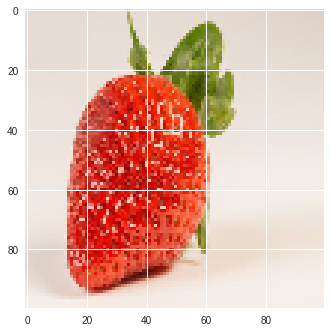

In [51]:
plt.imshow(img.reshape(100,100,3))

In [0]:
predict = model.predict([img])

In [53]:
dic_f[predict.argmax()]

'Strawberry'